In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers, regularizers
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical

Using TensorFlow backend.


# Part I - Feature extraction using Deep Learning

In [2]:
data_dir = '../input/art-movements/dataset/dataset/'

## Loading data

In [3]:
RESOLUTION = 150
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
        data_dir + 'train/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

val_generator = val_datagen.flow_from_directory(
        data_dir + 'train/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        data_dir + 'test/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 540 images belonging to 3 classes.
Found 228 images belonging to 3 classes.
Found 192 images belonging to 3 classes.


In [4]:
# Class labels
train_generator.class_indices

{'cubism': 0, 'expressionism': 1, 'romanticism': 2}

In [5]:
## Imagenet InceptionV3 weights
weights_v3_path = '../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

## Creating model (InceptionV3) using Transfer learning

In [6]:
conv_base = InceptionV3(include_top=False, input_shape=(150, 150, 3), weights=weights_v3_path)

## Freezing first 14. layers (Edges and basic shapes)
for layer in conv_base.layers[:14]:
    layer.treinable = False

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# adjust here to 3 class
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 26,522,403
Trainable params: 26,487,971
Non-trainable params: 34,432
_________________________________________________________________


In [8]:
N_TRAIN = 540
N_VAL = 228
history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=20,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE)
)

Epoch 1/20
8/8 [==============================] - 42s 5s/step - loss: 1.1620 - acc: 0.3887 - val_loss: 1.1249 - val_acc: 0.4115
Epoch 2/20
8/8 [==============================] - 18s 2s/step - loss: 0.7652 - acc: 0.7006 - val_loss: 0.9582 - val_acc: 0.5061
Epoch 3/20
8/8 [==============================] - 17s 2s/step - loss: 0.5752 - acc: 0.8322 - val_loss: 0.9604 - val_acc: 0.5488
Epoch 4/20
8/8 [==============================] - 17s 2s/step - loss: 0.4612 - acc: 0.8827 - val_loss: 0.8872 - val_acc: 0.5854
Epoch 5/20
8/8 [==============================] - 17s 2s/step - loss: 0.3689 - acc: 0.9118 - val_loss: 0.8650 - val_acc: 0.5833
Epoch 6/20
8/8 [==============================] - 17s 2s/step - loss: 0.3133 - acc: 0.9194 - val_loss: 0.7907 - val_acc: 0.6341
Epoch 7/20
8/8 [==============================] - 18s 2s/step - loss: 0.2603 - acc: 0.9261 - val_loss: 0.7600 - val_acc: 0.6341
Epoch 8/20
8/8 [==============================] - 16s 2s/step - loss: 0.2026 - acc: 0.9660 - val_loss: 0

## Report 

Text(0.5,1,'Training and validation loss')

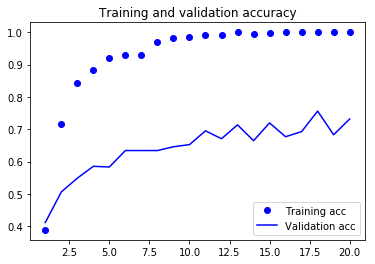

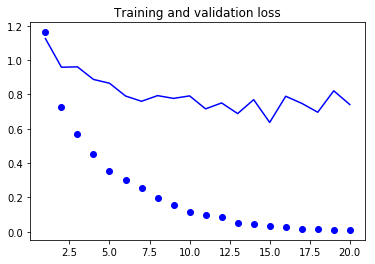

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
#plt.legend(loc='best')

In [10]:
# saving first model
models = []
models.append(model)

## Creating a new model (InceptionV3) without Transfer Learning

In [11]:
conv_base = InceptionV3(include_top=False, input_shape=(150, 150, 3), weights=None)

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# adjust here to 3 class
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [12]:
N_TRAIN = 540
N_VAL = 228
history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=20,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE)
)

Epoch 1/20
8/8 [==============================] - 46s 6s/step - loss: 1.1395 - acc: 0.4433 - val_loss: 1.0307 - val_acc: 0.4451
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 0.9724 - acc: 0.5160 - val_loss: 0.9759 - val_acc: 0.5417
Epoch 3/20
8/8 [==============================] - 17s 2s/step - loss: 0.9267 - acc: 0.5498 - val_loss: 0.9294 - val_acc: 0.5610
Epoch 4/20
8/8 [==============================] - 17s 2s/step - loss: 0.8634 - acc: 0.5869 - val_loss: 0.9903 - val_acc: 0.4939
Epoch 5/20
8/8 [==============================] - 17s 2s/step - loss: 0.8306 - acc: 0.6296 - val_loss: 0.9356 - val_acc: 0.5610
Epoch 6/20
8/8 [==============================] - 17s 2s/step - loss: 0.7699 - acc: 0.6710 - val_loss: 0.9500 - val_acc: 0.5781
Epoch 7/20
8/8 [==============================] - 20s 2s/step - loss: 0.8287 - acc: 0.6086 - val_loss: 0.9321 - val_acc: 0.5854
Epoch 8/20
8/8 [==============================] - 16s 2s/step - loss: 0.7458 - acc: 0.6780 - val_loss: 0

Text(0.5,1,'Training and validation loss')

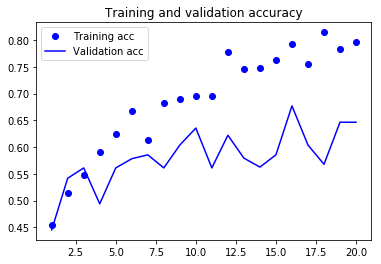

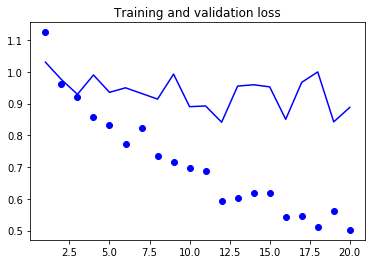

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
#plt.legend(loc='best')

In [14]:
models.append(model)

## Evaluate models for the test set

In [15]:
loss, acc = models[0].evaluate_generator(test_generator, steps=len(test_generator))
print('transfer learning model - loss:{} - acc:{}'.format(loss, acc))
loss, acc = models[1].evaluate_generator(test_generator, steps=len(test_generator))
print('without transfer learning model - loss:{} - acc:{}'.format(loss, acc))


transfer learning model - loss:0.8713305195172628 - acc:0.703125
without transfer learning model - loss:0.9708939989407858 - acc:0.5729166666666666


## The first model was better

## Remove classification layers (:-2)

In [16]:
# using first model, the accuracy is better.
model = models[0]
model.pop()
model.pop()
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
Total params: 21,802,784
Trainable params: 21,768,352
Non-trainable params: 34,432
_________________________________________________________________


## Save features as numpy arrays

In [17]:
Y_pred = model.predict_generator(test_generator, steps=len(test_generator))

In [18]:
np.save('features_.npy', Y_pred)

In [20]:
for name, arr_ in zip(test_generator.filenames, Y_pred):
    name = name.split('/')[1]
    name = name.split('.')[0]
    np.savetxt('{}'.format(name), arr_)